In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [34]:
df = pd.read_excel("Reporte_Fred.xls",parse_dates=["Fecha"]) #importar excel con datos diarios
df = df.set_index('Fecha') #formato fecha columna "Fecha"
df.head() 


,Puno,Granja Salcedo,Los Uros,Rincon de la Cruz,Mañazo,Umayo,Illpa,Capachica,Cabanillas,Lagunillas,Santa Lucia,Juliaca,Isla Taquile,Los Rosales
Fecha,,,,,,,,,,,,,,
1981-01-01,1.055381,1.055381,1.768833,1.124486,6.527376,2.506848,1.450641,1.512668,2.568420,3.879782,4.187809,9.964472,0.314903,4.040690
1981-01-02,0.358416,0.358416,1.375031,0.419796,0.830474,0.905006,0.421534,0.485755,2.131290,0.135782,0.359897,8.571392,11.789124,0.470622
1981-01-03,4.430766,4.430766,3.790666,5.111813,3.610356,3.401787,5.300224,7.247430,0.006095,8.611485,0.897279,4.992538,25.293331,2.415986
1981-01-04,4.333294,4.333294,7.564921,4.485079,5.191894,4.514864,5.117934,6.891667,10.505732,2.429222,0.464330,8.370489,2.900946,4.008249
1981-01-05,2.449920,2.449920,3.144224,2.064915,7.209180,2.834304,1.922991,3.803028,4.182236,3.377323,5.344374,8.918043,3.003328,3.767361


In [35]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31'],
              dtype='datetime64[ns]', name='Fecha', length=14744, freq=None)

In [36]:
#RESAMPLEAR.TOTAL MENSUAL Y TOTAL ANUAL
df_mensual = df.resample('M').sum()
df_anual= df.resample('Y').sum()
df_anual.describe()

,Puno,Granja Salcedo,Los Uros,Rincon de la Cruz,Mañazo,Umayo,Illpa,Capachica,Cabanillas,Lagunillas,Santa Lucia,Juliaca,Isla Taquile,Los Rosales
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,667.706157,667.706157,686.538418,669.731271,654.183525,562.134400,559.660775,729.326096,600.302230,582.535280,598.750573,786.044637,895.530290,558.742145
std,246.009581,246.009581,246.174269,241.525159,147.363989,205.990626,201.361446,269.742895,221.458535,218.761781,225.873541,280.255437,328.866981,207.974848
min,0.000000,0.000000,0.000000,0.000000,286.370941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,589.850734,589.850734,603.983693,599.005193,570.679960,494.282307,497.613470,631.543051,541.479301,511.146023,526.631148,711.095151,761.861417,488.896170
50%,724.152624,724.152624,697.428320,695.247082,642.181794,597.270966,582.977130,751.606328,621.310194,625.437574,626.024264,820.784339,952.926522,583.552663
75%,764.140279,764.140279,820.861563,817.486539,732.729129,655.702101,665.750725,885.586301,725.570114,704.487147,734.761398,908.710775,1060.888754,668.057232
max,1133.076890,1133.076890,1115.124540,1082.640076,1000.913100,964.295153,934.086735,1185.380177,926.353313,1049.076421,1060.680122,1342.500061,1425.168798,949.233336


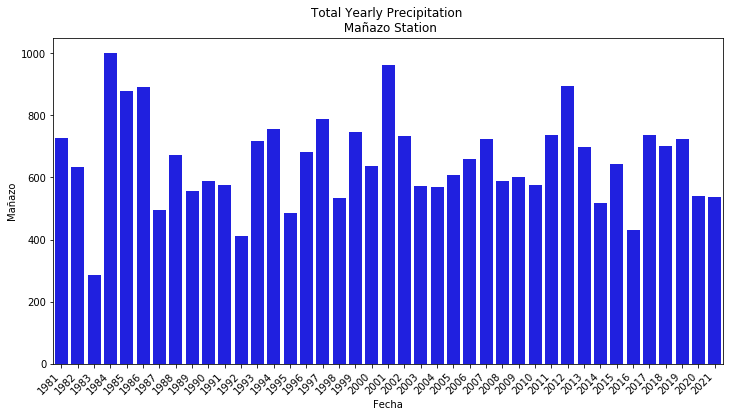

In [37]:
#GRAFICO EN BARRA DE PRECIPITACION ANUAL
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=df_anual, x=df_anual.index, y="Mañazo",ax=ax, color="blue")
x_dates= df_anual.index.strftime('%Y').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.title("Total Yearly Precipitation \n Mañazo Station")
#ax.set_xticklabels(df_anual.index, rotation=45)

plt.show()

In [38]:
#PROMEDIOS MENSUALES RANGO 1981-2018
m = df_mensual.index.month
result = df_mensual.groupby(m).mean()
# Rename month 1 to January, 2 to February, etc.
result.index = pd.date_range('1/1/2019', '12/1/2019', freq='MS').strftime('%B')
result

,Puno,Granja Salcedo,Los Uros,Rincon de la Cruz,Mañazo,Umayo,Illpa,Capachica,Cabanillas,Lagunillas,Santa Lucia,Juliaca,Isla Taquile,Los Rosales
January,148.421938,148.421938,147.664716,151.983620,156.644548,102.369578,94.788495,169.358368,134.108373,148.871440,125.503018,159.798979,202.816139,116.396736
February,141.287492,141.287492,139.960905,125.958605,135.398680,118.299113,130.481367,142.950915,118.197226,118.316943,131.929594,119.661596,182.106772,123.695283
March,117.826513,117.826513,122.026503,117.665926,99.765702,94.455041,107.527733,128.566146,99.524748,101.245428,120.085385,125.147818,161.630651,69.800847
April,55.037698,55.037698,55.726858,43.744506,49.288453,41.096915,40.641395,48.985016,47.237986,39.731002,42.037624,46.794476,73.680276,41.058484
May,7.146923,7.146923,7.921057,7.015109,5.110577,5.652551,4.858130,5.872455,3.802412,4.572224,3.240882,7.311388,14.818903,5.294760
June,3.679455,3.679455,2.769119,2.285485,4.207141,3.070244,2.356241,3.620804,3.573062,3.116649,2.327040,5.228664,4.211456,4.566695
July,2.709255,2.709255,3.050670,4.695505,3.260694,2.385089,1.898572,4.938786,2.366360,1.882240,1.545924,4.205877,5.597037,3.105222
August,9.319837,9.319837,9.983656,10.965365,7.292569,7.203166,5.776198,11.261303,6.831839,4.807914,3.945910,15.059206,10.414491,10.886429
September,20.313341,20.313341,20.061445,30.590543,14.365208,16.170187,16.275318,24.391602,12.698887,6.514579,6.859399,14.214235,37.287042,14.589232
October,39.042267,39.042267,42.344360,38.962224,32.752915,27.546251,40.138203,40.236785,37.107721,22.604144,30.044824,37.581886,47.621414,32.265956


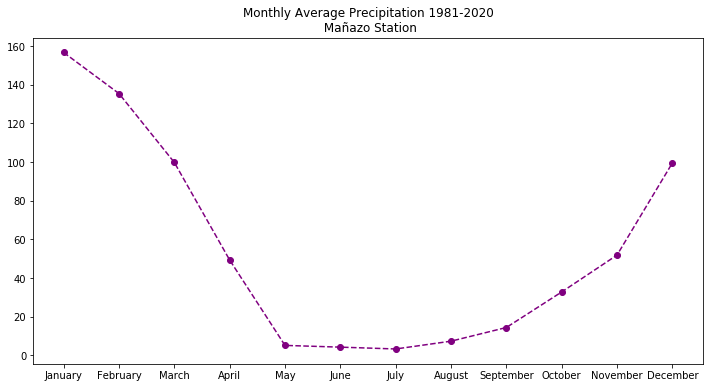

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(result.index,
        result['Mañazo'],
        color="purple",
        linestyle='dashed', marker="o")
    
plt.title("Monthly Average Precipitation 1981-2020\n Mañazo Station")
#ax.set_xticklabels(df_anual.index, rotation=45)



plt.show()